# Toxic Comment Classification 

### Training Data
Training data is taken from Wikipedia's talk page edit comments which have been flagged by humans for toxicity. 

### Methods
We have taken Non-ML and ML approaches to tackling this problem

### Looking at the training data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud

Loading the data as Pandas dataframes

In [25]:
training = pd.read_csv('data/input/train.csv')

Here's the first few rows of the training data

In [26]:
training.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


There are 6 categories of toxicity.
- Toxic
- Severe Toxic
- Obscene
- Threat
- Insult
- Identitiy Hate   

Each comment is given a 0 or 1 in each categories to determine their toxicity. A comment can recieve a 1 in multiple categories. 

In [27]:
training['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

We can see that the comment_text of each row is riddles with garbage, so some pre-processing needs to be done before we can train our models.

In [36]:
total_row = len(training)
total_row

159571

In [42]:
data_count=training.iloc[:,2:].sum()
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [43]:
toxic_rows = data_count.sum()
toxic_rows

35098

In [45]:
round(toxic_rows/total_row, 2)

0.22

We can see that around 22% of our training datat is considered toxic. 

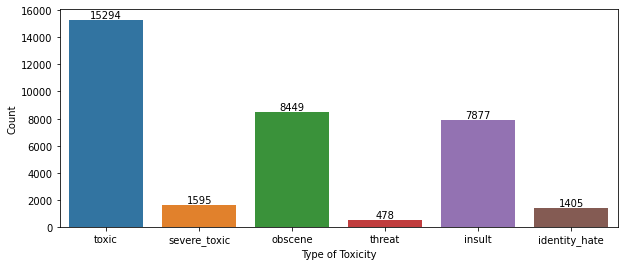

In [54]:
plt.figure(figsize=(10,4))
bar = sns.barplot(data_count.index, data_count.values)
plt.xlabel('Type of Toxicity')
plt.ylabel('Count')
rectangle = bar.patches
lable = data_count.values
for rectangle, lable in zip(rectangle,lable):
    h = rectangle.get_height()
    bar.text(rectangle.get_x() + rectangle.get_width()/2, h+5, lable, ha='center', va='bottom')
plt.show()

Convolution Neural NetworksHere is a spread of the different types of toxic comments. We can see that some of the categories have lower counts than the other, this will affect our performance later on.

<br />

### Apporach
We used Keras to model NN with the following models:
- LSTM/Bidirectional LSTM
- RNN/Bidirectional RNN
- GRU/Bidirectional GRU
- Convolution Neural Networks
- Fully Connected Networks
GloVe is used as an embedding weight. 
Additionally Naive Bayes is implemented to see how it compares to more modern techniques. 

<br />

### Results 

Using sklearn's classification repot, we can get an guage on our model's performances.


In [51]:
%run -i "metrics"  -a

Metrics for CNN-GloVE.csv

Accuracy for toxic: 0.8984494670042827
Accuracy for severe_toxic: 0.9942636531307637
Accuracy for obscene: 0.9311013160774017
Accuracy for threat: 0.9967019913095126
Accuracy for insult: 0.9232861296070525
Accuracy for identity_hate: 0.9888711744662227
               precision    recall  f1-score   support

        toxic       0.48      0.89      0.62      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.45      0.88      0.60      3691
       threat       0.00      0.00      0.00       211
       insult       0.40      0.84      0.54      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.45      0.80      0.57     14498
    macro avg       0.22      0.43      0.29     14498
 weighted avg       0.41      0.80      0.54     14498
  samples avg       0.07      0.08      0.07     14498



Metrics for CNN.csv

Accuracy for toxic: 0.8906030197880521
Accuracy for severe_toxic: 0.9942636531307637
Accu

Putting the results into graphs, 
![](images/accuracy.png)
![](images/percision.png)
![](images/recall.png)
![](images/f1.png)


From the graphs, we can see that LSTM with GloVe embedding offers the best performance classifiying toxic text. The performance difference between bidirectional networks and unidirectional networks is minimal. 

### Conclusion 

Why is the f1 scores so low? Our hypothesis is that since the training data is created and tagged by multiple users, there is ambiguity about the definition of toxicity. Let's take a deeper look at the training data. 



In [56]:
data_toxic = training.loc[:,['id','comment_text','toxic']]
data_sev_toxic = training.loc[:,['id','comment_text','severe_toxic']]
data_obscene = training.loc[:,['id','comment_text','obscene']]
data_threat = training.loc[:,['id','comment_text','threat']]
data_insult = training.loc[:,['id','comment_text','insult']]
data_identity_hate = training.loc[:,['id','comment_text','identity_hate']]

In [63]:
def wordcloud(df, label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title(label, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

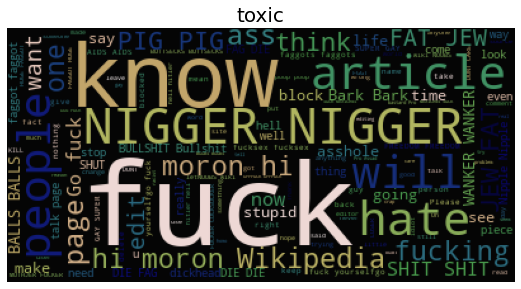

In [65]:
wordcloud(data_toxic,'toxic')

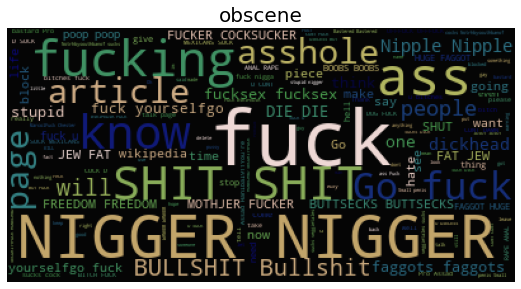

In [66]:
wordcloud(data_obscene,'obscene')

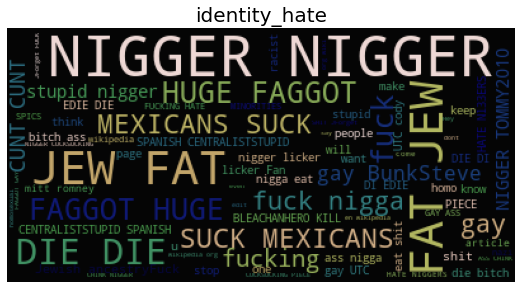

In [67]:
wordcloud(data_identity_hate,'identity_hate')

We can see that from the wordclouds, different categories have similar words. Since the training data is flagged by multiple humans, ambiguous nature of toxicity may give the trainig data conflicting answers 